<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/SNS_Actividad_3_2_%E2%80%93_Comparativa_clasificadores_NaiveBayes(Penguins).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

23_24 Carlos Javier Delgado Bolaños

In [ ]:
# importación de datos
import seaborn as sns
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
y_penguins = penguins['species']
# separamos datos de entrada y salida
X_penguins = penguins.drop(['species','island','sex'], axis=1)


media_por_columna = X_penguins.mean()

# Rellenar los valores NaN con la media de cada columna
X_penguins = X_penguins.fillna(media_por_columna)
X_penguins = X_penguins.round(1)
#print(X_penguins)

# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.20, random_state=1)
#TODO: IMPORTANTE REVISAR ERROR test_size dadao que hacia que se saliese de indice

print(len(ytest))
print(Xtest.shape[0])

print(Xtrain.index)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

69
69
Int64Index([150, 105, 112, 162, 328, 305, 283, 179, 119,  14,
            ...
             71, 129, 144, 335, 133, 203, 255,  72, 235,  37],
           dtype='int64', length=275)
(275, 4)
(69, 4)
(275,)
(69,)


In [ ]:
print(len(ytest))
print(Xtest.shape[0])
print(X_penguins.columns)
print(Xtest.columns)
print(Xtest.shape)

69
69
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')
(69, 4)


In [ ]:
# 1. elegimos clasificador
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, BernoulliNB, ComplementNB, GaussianNB
# 2. instanciamos el modelo
modelCategoricalNB = CategoricalNB()
modelMultinomialNB = MultinomialNB()
modelBernoulliNB = BernoulliNB()
modelComplementNB = ComplementNB()
modelGaussianNB = GaussianNB()

# 3. Entrenamiento con los datos


modelBernoulliNB.fit(Xtrain, ytrain)
modelComplementNB.fit(Xtrain, ytrain)
modelGaussianNB.fit(Xtrain, ytrain)
modelCategoricalNB.fit(Xtrain, ytrain)
modelMultinomialNB.fit(Xtrain, ytrain)


MultinomialNB()

In [ ]:
# 4. Predicción con nuevos datos
y_modelCategoricalNB = modelCategoricalNB.predict(Xtest)
y_modelMultinomialNB = modelMultinomialNB.predict(Xtest)
y_modelBernoulliNB = modelBernoulliNB.predict(Xtest)
y_modelComplementNB = modelComplementNB.predict(Xtest)
y_modelGaussianNB = modelGaussianNB.predict(Xtest)

y_modelGaussianNB

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie'], dtype='<U9')

In [ ]:
# 5 evaluación
# Compara si los resultados obtenidos por el modelo (y_model) coinciden con los datos y_test esperados
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_modelCategoricalNB)) # Precisión del modelo
print(accuracy_score(ytest, y_modelMultinomialNB))
print(accuracy_score(ytest, y_modelBernoulliNB))
print(accuracy_score(ytest, y_modelComplementNB))
print(accuracy_score(ytest, y_modelGaussianNB))




0.9565217391304348
0.8260869565217391
0.4927536231884058
0.7391304347826086
0.9565217391304348


In [ ]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
especies_distintas = ytest_df['species'].unique()
ytest_df['species'].replace(especies_distintas,[0, 1, 2], inplace=True)
ytest_df

,species
306,0
341,0
291,0
102,1
289,0
...,...
89,1
29,1
58,1
212,2


In [ ]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos


print(especies_distintas)
y_model_dfCategoricalNB= pd.DataFrame(y_modelCategoricalNB, columns = ['species'])
y_model_dfCategoricalNB['species'].replace(especies_distintas,[0, 1, 2], inplace=True)

y_model_dfMultinomialNB= pd.DataFrame(y_modelMultinomialNB, columns = ['species'])
y_model_dfMultinomialNB['species'].replace(especies_distintas,[0, 1, 2], inplace=True)

y_model_dfBernoulliNB= pd.DataFrame(y_modelBernoulliNB, columns = ['species'])
y_model_dfBernoulliNB['species'].replace(especies_distintas,[0, 1, 2], inplace=True)

y_model_dfComplementNB= pd.DataFrame(y_modelComplementNB, columns = ['species'])
y_model_dfComplementNB['species'].replace(especies_distintas,[0, 1, 2], inplace=True)



y_model_dfGaussianNB= pd.DataFrame(y_modelGaussianNB, columns = ['species'])
y_model_dfGaussianNB['species'].replace(especies_distintas,[0, 1, 2], inplace=True)





# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_arrayCategoricalNB = y_model_dfCategoricalNB['species'].to_numpy()
y_model_arrayMultinomialNB = y_model_dfMultinomialNB['species'].to_numpy()
y_model_arrayBernoulliNB = y_model_dfBernoulliNB['species'].to_numpy()
y_model_arrayComplementNB = y_model_dfComplementNB['species'].to_numpy()
y_model_arrayGaussianNB = y_model_dfGaussianNB['species'].to_numpy()


['Gentoo' 'Adelie' 'Chinstrap']


['Gentoo' 'Adelie' 'Chinstrap']
     species
306        0
341        0
291        0
102        1
289        0
..       ...
89         1
29         1
58         1
212        2
93         1

[69 rows x 1 columns]
Confusion matrix, without normalization
[[24  0  0]
 [ 0 32  2]
 [ 0  1 10]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

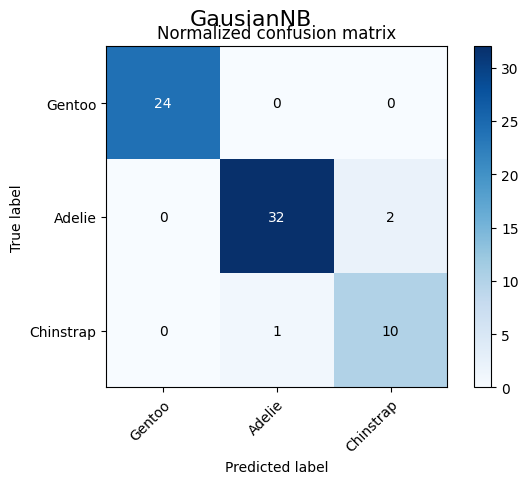

In [ ]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función
clases_iris = np.array(especies_distintas)

print(especies_distintas)
print(ytest_df)
y_model_arrayGaussianNB
y_model_arrayGaussianNB
plot_confusion_matrix(ytest_df['species'], y_model_arrayGaussianNB, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='GausianNB')


Confusion matrix, without normalization
[[24  0  0]
 [ 9 25  0]
 [ 2  7  2]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

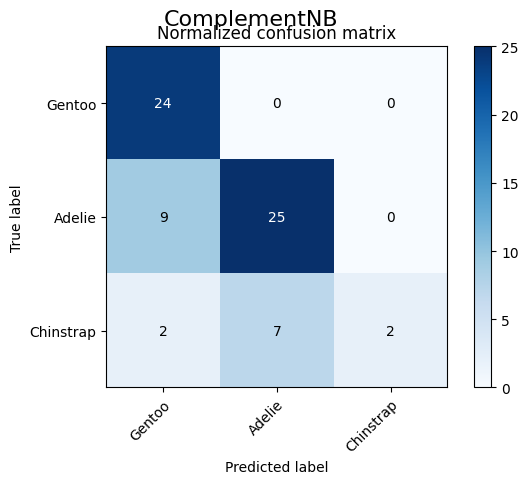

In [ ]:
plot_confusion_matrix(ytest_df['species'], y_model_arrayComplementNB, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')

Confusion matrix, without normalization
[[ 0 24  0]
 [ 0 34  0]
 [ 0 11  0]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

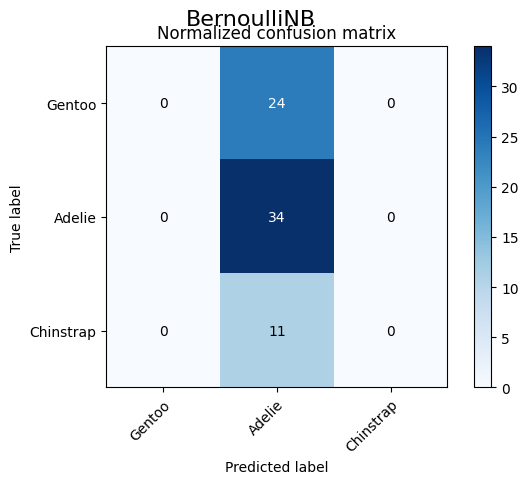

In [ ]:
plot_confusion_matrix(ytest_df['species'], y_model_arrayBernoulliNB, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='BernoulliNB')

Confusion matrix, without normalization
[[23  1  0]
 [ 4 25  5]
 [ 1  1  9]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

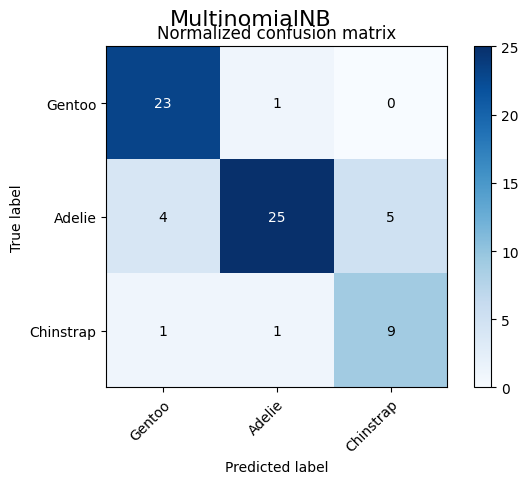

In [ ]:
plot_confusion_matrix(ytest_df['species'], y_model_arrayMultinomialNB, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='MultinomialNB')

Confusion matrix, without normalization
[[24  0  0]
 [ 0 33  1]
 [ 0  2  9]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

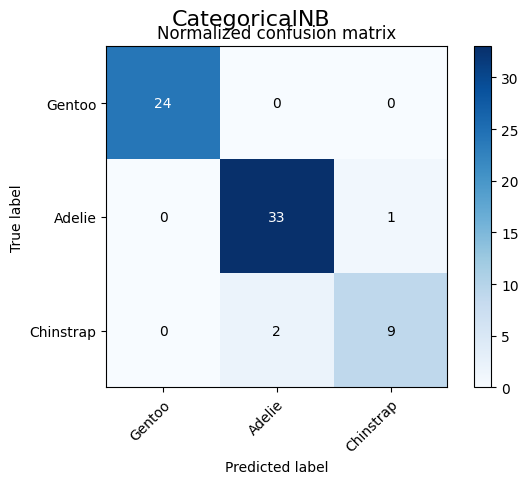

In [ ]:
plot_confusion_matrix(ytest_df['species'], y_model_arrayCategoricalNB, classes=clases_iris, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB')